In [208]:
# funkce f,g,h
import numpy as np

def f(x):
    return x**2 -2*x + 1                    # body: x = 0, x = 1, x = 3

def g(x):
    return 3* np.log(2*x + 1) - 0.5        # body x = 0 , x = 10, x = -0.5

def h(x):
    return np.cos(x -np.pi/2) - np.pi/4     # x = -pi/4 , x = 0, x = pi



print(g(5))

6.693685818395112


In [187]:
def add_noise(f, magnitude=0.5):
    def f_noise(x):
        y = f(x)
        noise = np.random.normal(0, magnitude, len(x))  # Generování šumu pro všechny hodnoty x
        y += noise  # Přidání šumu ke všem funkčním hodnotám
        return y
    return f_noise

f_noise = add_noise(f, magnitude=0.2 )
g_noise = add_noise(g, magnitude=0.2 )
h_noise = add_noise(h, magnitude= 0.2)

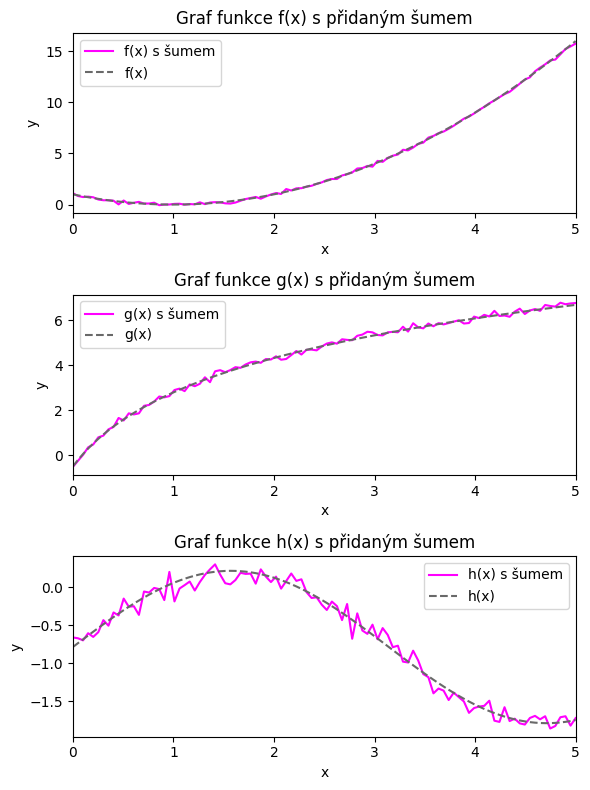

In [191]:
import numpy as np
import matplotlib.pyplot as plt

# Funkce pro přidání šumu k funkčním hodnotám
def add_noise(f, magnitude=0.1):
    def f_noise(x):
        y = f(x)
        noise = np.random.normal(0, magnitude, len(x))  # Generování šumu pro všechny hodnoty x
        y += noise  # Přidání šumu ke všem funkčním hodnotám
        return y
    return f_noise

# Aplikace šumu na funkce
f_noise = add_noise(f)
g_noise = add_noise(g)
h_noise = add_noise(h)

x_values = np.linspace(0, 5, 100)

# Vytvoření grafu
plt.figure(figsize=(6,8))

# Graf funkce f(x) s přidaným šumem v intervalu [0, 5]
plt.subplot(3, 1, 1)
plt.plot(x_values, f_noise(x_values), color="fuchsia", label="f(x) s šumem")
plt.plot(x_values, f(x_values), color="dimgrey", linestyle="dashed", label="f(x)")
plt.title("Graf funkce f(x) s přidaným šumem")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 5)  # Nastavení intervalu na ose x
plt.legend()

# Graf funkce g(x) s přidaným šumem
plt.subplot(3, 1, 2)
plt.plot(x_values, g_noise(x_values), color="fuchsia", label="g(x) s šumem")
plt.plot(x_values, g(x_values), color="dimgrey", linestyle="dashed", label="g(x)")
plt.title("Graf funkce g(x) s přidaným šumem")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 5)  # Nastavení intervalu na ose x
plt.legend()

# Graf funkce h(x) s přidaným šumem
plt.subplot(3, 1, 3)
plt.plot(x_values, h_noise(x_values), color="fuchsia", label="h(x) s šumem")
plt.plot(x_values, h(x_values), color="dimgrey", linestyle="dashed", label="h(x)")
plt.title("Graf funkce h(x) s přidaným šumem")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 5)  # Nastavení intervalu na ose x
plt.legend()

plt.tight_layout()
plt.show()

[-5.         -4.72222222 -4.44444444 -4.16666667 -3.88888889]
[-3.88888889 -3.61111111 -3.33333333 -3.05555556 -2.77777778]
[-2.77777778 -2.5        -2.22222222 -1.94444444 -1.66666667]
[-1.66666667 -1.38888889 -1.11111111 -0.83333333 -0.55555556]
[-0.55555556 -0.27777778  0.          0.27777778  0.55555556]
[0.55555556 0.83333333 1.11111111 1.38888889 1.66666667]
[1.66666667 1.94444444 2.22222222 2.5        2.77777778]
[2.77777778 3.05555556 3.33333333 3.61111111 3.88888889]
[3.88888889 4.16666667 4.44444444 4.72222222 5.        ]


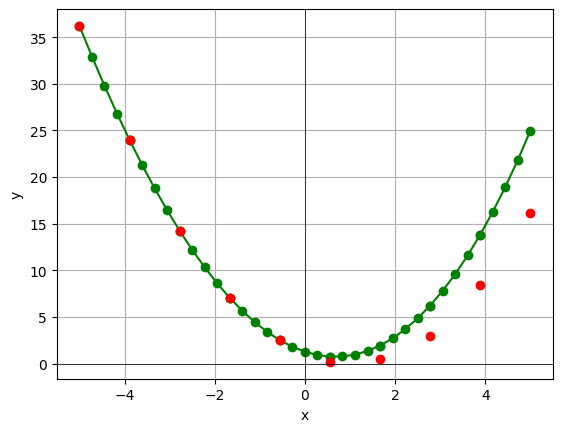

In [198]:
# f
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5, 10)  # Definice daných bodů (celkem 10)
fx = f_noise(x)  # Hodnoty funkce f(x) v daných bodech



def lagrangeova_interpolace(x, y, xi, n):
    vysledek = 0  # Inicializace výsledku interpolace
    for i in range(n):  # Suma přes i
        li = y[i]  # Počáteční hodnota pro dílčí člen (nejprve f(xi))
        for j in range(n):
            if j != i:
                li = li * (xi - x[j]) / (x[i] - x[j])  # Lagrangeův polynom
        vysledek += li  # Přičtení dílčího členu k výsledku interpolace
    return vysledek

nové_x = []  # Nové (interpolované) body
nové_y = []

počet_bodů_interpolace = 5  # Počet nových bodů mezi každými dvěma existujícími body

for i in range(len(x) - 1):  # Přes všechny úseky
    x_interp = np.linspace(x[i], x[i+1], počet_bodů_interpolace)  # Nové x v jednom úseku
    print(x_interp)  # Výpis nových x na jednom úseku
    g = lagrangeova_interpolace(x, fx, x_interp, počet_bodů_interpolace)
    nové_x.extend(x_interp)  # Rozšíření seznamu o nové body x
    nové_y.extend(g)

plt.plot(nové_x, nové_y, "go-")
plt.plot(x, fx, "ro")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)  # Zvýraznění osy x
plt.axvline(0, color='black', linewidth=0.5)  # Zvýraznění osy y
plt.grid()
plt.show()


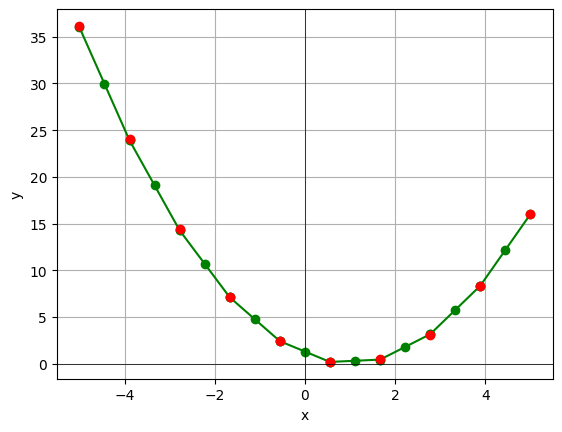

In [207]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5, 10)  # Definice daných bodů (celkem 10)
fx = f_noise(x)  # Hodnoty funkce f(x) v daných bodech

def linear(x, a, b):
    return f(a) + (f(b)-f(a))/(b-a)*(x-a)

phi = []                                                # nové hodnoty fi (na úsečkách)
xphi = []                                               # nové hodnoty xi

ninterpol = 3                                           # počet bodů na úsečce (vč. krajních)
for i in range(len(x)-1):                               # přes všechny úsečky (len(x) počet bodů)
    xinterpol = np.linspace(x[i], x[i+1], ninterpol)    # body, které mě zajímají na úsečce; x[i] a x[i+1] krajní body
    g = linear(xinterpol, x[i], x[i+1])                 # hodnoty y bodů na úsečce
    xphi.extend(xinterpol)                              # rozšíření xi o nové body (x)
    phi.extend(g)                                       # rozšíření fi o nové body (y)

plt.plot(xphi, phi, "go-")                              # nové body (vykreslení a pospojování)
plt.plot(x, fx, "ro")  
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)  # Zvýraznění osy x
plt.axvline(0, color='black', linewidth=0.5)  # Zvýraznění osy y                          
plt.grid()
plt.show()

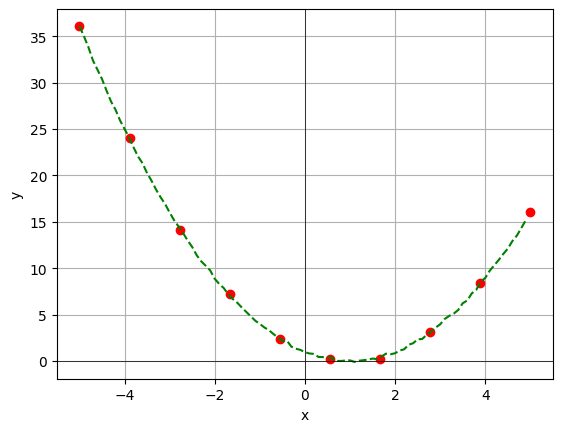

In [204]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,10)  # Definice daných bodů (celkem 10)
fx = f_noise(x)  # Hodnoty funkce f(x) v daných bodech

def poměrné_diference(x, y):    
    n = len(y)
    koeficienty = np.zeros([n, n])
    koeficienty[:,0] = y
    for j in range(1, n):
        for i in range(n-j):
            koeficienty[i][j] = (koeficienty[i+1][j-1] - koeficienty[i][j-1]) / (x[i+j]-x[i])
    return koeficienty

def newtonuv_polynom(koeficienty, x_data, x):
    n = len(x_data) - 1 
    p = koeficienty[n]
    for k in range(1, n+1):
        p = koeficienty[n-k] + (x - x_data[n-k])*p
    return p

a_s = poměrné_diference(x, fx)[0, :]
x_nové = np.arange(x[0], x[-1], .1)  
y_nové = newtonuv_polynom(a_s, x, x_nové)  
plt.plot(x, fx, 'ro')
plt.plot(x_nové, f_noise(x_nové), 'g--')
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)  # Zvýraznění osy x
plt.axvline(0, color='black', linewidth=0.5)  # Zvýraznění osy y                          
plt.grid()
plt.show()


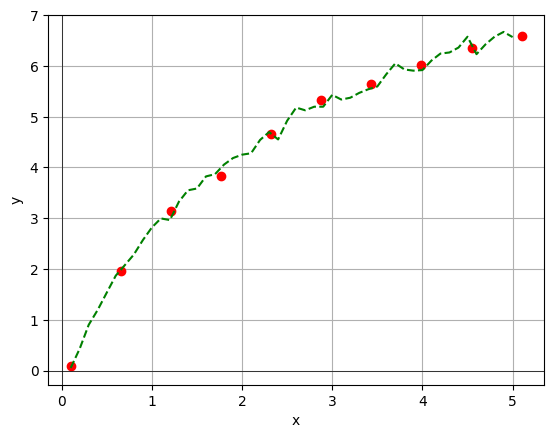

In [197]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.1,5.1, 10)  # Definice daných bodů (celkem 10)
gx = g_noise(x)  # Hodnoty funkce f(x) v daných bodech

def poměrné_diference(x, y):    
    n = len(y)
    koeficienty = np.zeros([n, n])
    koeficienty[:,0] = y
    for j in range(1, n):
        for i in range(n-j):
            koeficienty[i][j] = (koeficienty[i+1][j-1] - koeficienty[i][j-1]) / (x[i+j]-x[i])
    return koeficienty

def newtonuv_polynom(koeficienty, x_data, x):
    n = len(x_data) - 1 
    p = koeficienty[n]
    for k in range(1, n+1):
        p = koeficienty[n-k] + (x - x_data[n-k])*p
    return p

a_s = poměrné_diference(x, gx)[0, :]
x_nové = np.arange(x[0], x[-1], .1)  
y_nové = newtonuv_polynom(a_s, x, x_nové)  
plt.plot(x, gx, 'ro')
plt.plot(x_nové, g_noise(x_nové), 'g--')
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)  # Zvýraznění osy x
plt.axvline(0, color='black', linewidth=0.5)  # Zvýraznění osy y                          
plt.grid()
plt.show()


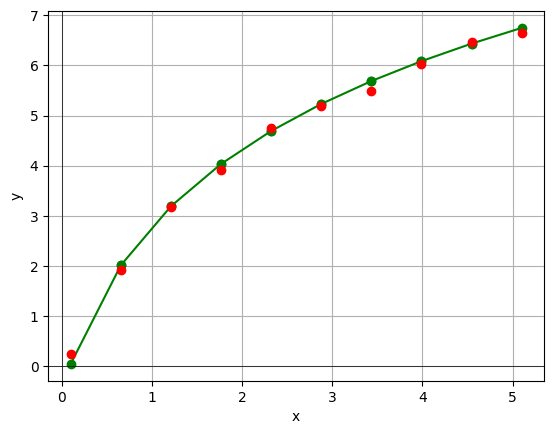

In [220]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.1,5.1, 10)  # Definice daných bodů (celkem 10)
gx = g_noise(x)  # Hodnoty funkce f(x) v daných bodech

def linear(x, a, b):
    return g(a) + (g(b)-g(a))/(b-a)*(x-a)

phi = []                                                # nové hodnoty fi (na úsečkách)
xphi = []                                               # nové hodnoty xi

ninterpol = 2                                           # počet bodů na úsečce (vč. krajních)
for i in range(len(x)-1):                               # přes všechny úsečky (len(x) počet bodů)
    xinterpol = np.linspace(x[i], x[i+1], ninterpol)    # body, které mě zajímají na úsečce; x[i] a x[i+1] krajní body
    u = linear(xinterpol, x[i], x[i+1])                 # hodnoty y bodů na úsečce
    xphi.extend(xinterpol)                              # rozšíření xi o nové body (x)
    phi.extend(u)                                       # rozšíření fi o nové body (y)

plt.plot(xphi, phi, "go-")                              # nové body (vykreslení a pospojování)
plt.plot(x, gx, "ro")  
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)  # Zvýraznění osy x
plt.axvline(0, color='black', linewidth=0.5)  # Zvýraznění osy y                          
plt.grid()
plt.show()

[0.1        0.37777778 0.65555556]
[0.65555556 0.93333333 1.21111111]
[1.21111111 1.48888889 1.76666667]
[1.76666667 2.04444444 2.32222222]
[2.32222222 2.6        2.87777778]
[2.87777778 3.15555556 3.43333333]
[3.43333333 3.71111111 3.98888889]
[3.98888889 4.26666667 4.54444444]
[4.54444444 4.82222222 5.1       ]


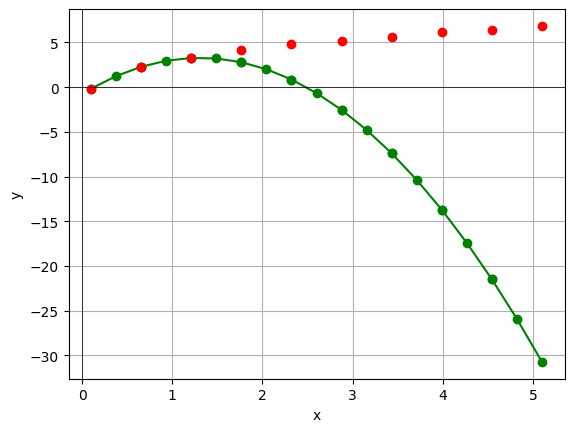

In [226]:
# f
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.1,5.1, 10)  # Definice daných bodů (celkem 10)
gx = g_noise(x)  # Hodnoty funkce f(x) v daných bodech



def lagrangeova_interpolace(x, y, xi, n):
    vysledek = 0  # Inicializace výsledku interpolace
    for i in range(n):  # Suma přes i
        li = y[i]  # Počáteční hodnota pro dílčí člen (nejprve f(xi))
        for j in range(n):
            if j != i:
                li = li * (xi - x[j]) / (x[i] - x[j])  # Lagrangeův polynom
        vysledek += li  # Přičtení dílčího členu k výsledku interpolace
    return vysledek

nové_x = []  # Nové (interpolované) body
nové_y = []

počet_bodů_interpolace = 3  # Počet nových bodů mezi každými dvěma existujícími body

for i in range(len(x) - 1):  # Přes všechny úseky
    x_interp = np.linspace(x[i], x[i+1], počet_bodů_interpolace)  # Nové x v jednom úseku
    print(x_interp)  # Výpis nových x na jednom úseku
    g = lagrangeova_interpolace(x, gx, x_interp, počet_bodů_interpolace)
    nové_x.extend(x_interp)  # Rozšíření seznamu o nové body x
    nové_y.extend(g)

plt.plot(nové_x, nové_y, "go-")
plt.plot(x, gx, "ro")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)  # Zvýraznění osy x
plt.axvline(0, color='black', linewidth=0.5)  # Zvýraznění osy y
plt.grid()
plt.show()

[-3.14159265 -2.7925268  -2.44346095]
[-2.44346095 -2.0943951  -1.74532925]
[-1.74532925 -1.3962634  -1.04719755]
[-1.04719755 -0.6981317  -0.34906585]
[-0.34906585  0.          0.34906585]
[0.34906585 0.6981317  1.04719755]
[1.04719755 1.3962634  1.74532925]
[1.74532925 2.0943951  2.44346095]
[2.44346095 2.7925268  3.14159265]


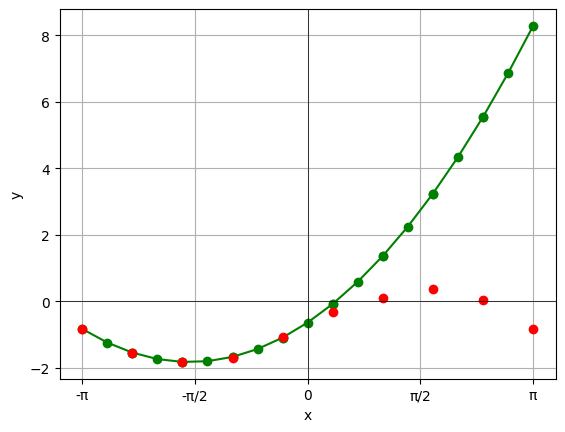

In [269]:
# f
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 10)  # Definice daných bodů (celkem 10)
hx = h_noise(x)  # Hodnoty funkce f(x) v daných bodech



def lagrangeova_interpolace(x, y, xi, n):
    vysledek = 0  # Inicializace výsledku interpolace
    for i in range(n):  # Suma přes i
        li = y[i]  # Počáteční hodnota pro dílčí člen (nejprve f(xi))
        for j in range(n):
            if j != i:
                li = li * (xi - x[j]) / (x[i] - x[j])  # Lagrangeův polynom
        vysledek += li  # Přičtení dílčího členu k výsledku interpolace
    return vysledek

nové_x = []  # Nové (interpolované) body
nové_y = []

počet_bodů_interpolace = 3  # Počet nových bodů mezi každými dvěma existujícími body

for i in range(len(x) - 1):  # Přes všechny úseky
    x_interp = np.linspace(x[i], x[i+1], počet_bodů_interpolace)  # Nové x v jednom úseku
    print(x_interp)  # Výpis nových x na jednom úseku
    g = lagrangeova_interpolace(x, hx, x_interp, počet_bodů_interpolace)
    nové_x.extend(x_interp)  # Rozšíření seznamu o nové body x
    nové_y.extend(g)

plt.plot(nové_x, nové_y, "go-")
plt.plot(x, hx, "ro")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)  # Zvýraznění osy x
plt.axvline(0, color='black', linewidth=0.5)  # Zvýraznění osy y
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],["-π","-π/2","0","π/2","π"])
plt.grid()
plt.show()


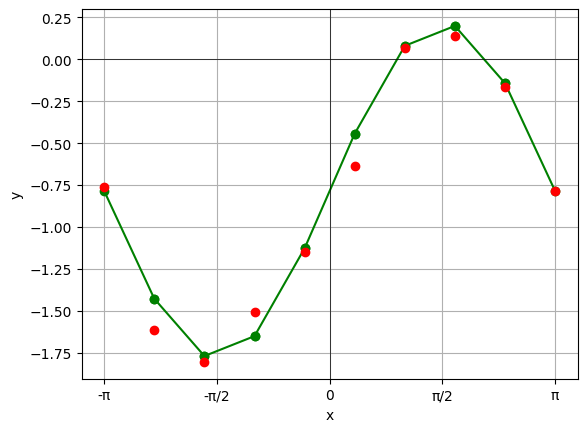

Absolutní odchylka mezi h(0) a interpolovanou hodnotou: 2.892544243589426
Součet čtverců rozdílů (SSE): 0.030479178109355465


In [246]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi,np.pi, 10)  # Definice daných bodů (celkem 10)
hx = h_noise(x)  # Hodnoty funkce f(x) v daných bodech

def linear(x, a, b):
    return h(a) + (h(b)-h(a))/(b-a)*(x-a)

phi = []                                                # nové hodnoty fi (na úsečkách)
xphi = []                                               # nové hodnoty xi

ninterpol = 2                                           # počet bodů na úsečce (vč. krajních)
for i in range(len(x)-1):                               # přes všechny úsečky (len(x) počet bodů)
    xinterpol = np.linspace(x[i], x[i+1], ninterpol)    # body, které mě zajímají na úsečce; x[i] a x[i+1] krajní body
    u = linear(xinterpol, x[i], x[i+1])                 # hodnoty y bodů na úsečce
    xphi.extend(xinterpol)                              # rozšíření xi o nové body (x)
    phi.extend(u)                                       # rozšíření fi o nové body (y)

plt.plot(xphi, phi, "go-")                              # nové body (vykreslení a pospojování)
plt.plot(x, hx, "ro")  
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)  # Zvýraznění osy x
plt.axvline(0, color='black', linewidth=0.5)  # Zvýraznění osy y     
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],["-π","-π/2","0","π/2","π"])                     
plt.grid()
plt.show()

# Výpočet hodnoty funkce h v bodě 0
h_0 = h(0)

# Výpočet interpolované hodnoty funkce h v bodě 0
# Výpočet interpolované hodnoty funkce h v bodě 0
h_noise_interpoled_0 = linear(0, x[0], x[1])


# Výpočet absolutní odchylky
abs_odchylka = abs(h_0 - h_noise_interpoled_0)

print("Absolutní odchylka mezi h(0) a interpolovanou hodnotou:", abs_odchylka)

sse = np.sum((np.array(h_noise(x)) - np.array(h(x)))**2)
print("Součet čtverců rozdílů (SSE):", sse)




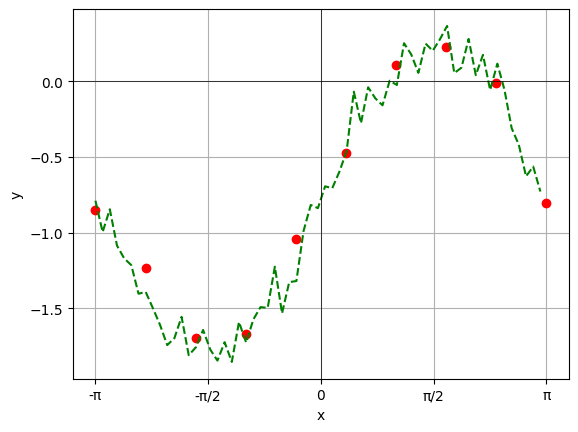

Absolutní odchylka mezi h(0) a interpolovanou hodnotou: 0.0352577353147242
Součet čtverců rozdílů (SSE): 0.7353355015237176


In [244]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi,np.pi, 10)  # Definice daných bodů (celkem 10)
hx = h_noise(x)  # Hodnoty funkce f(x) v daných bodech

def poměrné_diference(x, y):    
    n = len(y)
    koeficienty = np.zeros([n, n])
    koeficienty[:,0] = y
    for j in range(1, n):
        for i in range(n-j):
            koeficienty[i][j] = (koeficienty[i+1][j-1] - koeficienty[i][j-1]) / (x[i+j]-x[i])
    return koeficienty

def newtonuv_polynom(koeficienty, x_data, x):
    n = len(x_data) - 1 
    p = koeficienty[n]
    for k in range(1, n+1):
        p = koeficienty[n-k] + (x - x_data[n-k])*p
    return p

a_s = poměrné_diference(x, hx)[0, :]
x_nové = np.arange(x[0], x[-1], .1)  
y_nové = newtonuv_polynom(a_s, x, x_nové)  
plt.plot(x, hx, 'ro')
plt.plot(x_nové, h_noise(x_nové), 'g--')
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='black', linewidth=0.5)  # Zvýraznění osy x
plt.axvline(0, color='black', linewidth=0.5)  # Zvýraznění osy y  
plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],["-π","-π/2","0","π/2","π"])                              
plt.grid()
plt.show()

# Výpočet hodnoty funkce h v bodě 0
h_0 = h(0)

# Výpočet interpolované hodnoty funkce h v bodě 0
h_noise_interpoled_0 = newtonuv_polynom(a_s, x, [0])[0]

# Výpočet absolutní odchylky
abs_odchylka = abs(h_0 - h_noise_interpoled_0)

print("Absolutní odchylka mezi h(0) a interpolovanou hodnotou:", abs_odchylka)

sse = np.sum((np.array(h_noise(x_nové)) - np.array(h(x_nové)))**2)

# Výpis součtu čtverců rozdílů
print("Součet čtverců rozdílů (SSE):", sse)